## <font color='darkblue'>Section3: Bootstrap Estimations and Bagging</font>
This course is from Udemy <b>["Ensemble Machine Learning in Python"](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/)</b>. This section is coming from [here](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/learn/lecture/6240244#overview).

## <font color='darkBlue'>Bootstrap Estimation</font>
* I hinted earlier that combining several models could help us get lower bias and lower variance at the same time
* Key tool we need first: <b>[Bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics))</b>
* aka. resampling
* Fascinating result:
    * Same data
    * Calculate the same thing several times
    * Better results!
* But first, let's look at bootstrap for simple parameter estimates like mean
> Given: X = {$x_{1}$,$x_{2}$,...,$x_{N}$} <br/>
> for b=1..B: <br/>
>     $X_{b}$ = sample_with_replacement(X) # size of $X_{b}$ is N <br/>
>     sample_mean[b] = sum($X_{b}$)/N <br/>
> Calculate mean and variance of {sample_mean[1], ..., sample_mean[B]} <br/>
> Why? Big variance -> not confident about value of mean <br/>

### <font color='darkgreen'>Sampling with replacement</font>
> Given X = {1,2,3,4,5} <br/>
> I sample from this and I get 5 <br/>
> I sample again and I can get 5 again. <br/>
> In fact, it's possible to get {5,5,5,5,5} <br/>
> If I sampled without replacement, the only possible result is the original dataset (not considering order) <br/>

## <font color='darkblue'>Bootstrap Demo</font>
This part will show the parameters of bootstrap and code is from [`bootstrap.py`](https://github.com/lazyprogrammer/machine_learning_examples/blob/master/supervised_class2/bootstrap.py)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

B = 200
N = 20
X = np.random.randn(N)

print("sample mean of X:", X.mean())

sample mean of X: -0.15392533249371892


Now let's do the bootstrap:

In [2]:
individual_estimates = np.empty(B)
for b in range(B):
    sample = np.random.choice(X, size=N)
    individual_estimates[b] = sample.mean()

Now let's check the parameters of bootstrap result:

bootstrap mean of X: -0.14954959743576476


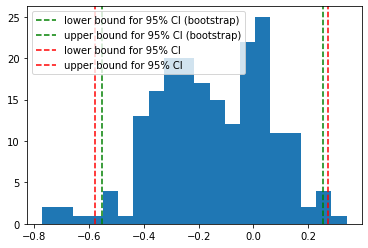

In [4]:
bmean = individual_estimates.mean()
bstd = individual_estimates.std()
lower = bmean + norm.ppf(0.025)*bstd # norm.ppf(0.025) == -1.96
upper = bmean + norm.ppf(0.975)*bstd # norm.ppf(0.975) == +1.96

# traditional way of calculating CI
lower2 = X.mean() + norm.ppf(0.025)*X.std()/np.sqrt(N)
upper2 = X.mean() + norm.ppf(0.975)*X.std()/np.sqrt(N)

print("bootstrap mean of X:", bmean)

plt.hist(individual_estimates, bins=20)
plt.axvline(x=lower, linestyle='--', color='g', label="lower bound for 95% CI (bootstrap)")
plt.axvline(x=upper, linestyle='--', color='g', label="upper bound for 95% CI (bootstrap)")
plt.axvline(x=lower2, linestyle='--', color='r', label="lower bound for 95% CI")
plt.axvline(x=upper2, linestyle='--', color='r', label="upper bound for 95% CI")
plt.legend()
plt.show()

## <font color='darkblue'>Bagging</font>
([link](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/learn/lecture/6240248#overview))
* Bagging = bootstrap aggregating = application of bootstrap to ML models.
* Looks exactly like bootstrapping except instead of calculating a "theta_hat", we train a model instead.

### <font color='darkgreen'>Training</font>
Pseudo code as below:
```python
models = []
for b = 1..B:
    model = Model()
    Xb, Yb = resample(X)
    model.fit(Xb, Yb)
    models.append(model)
```

### <font color='darkgreen'>Prediction</font>
Average if regression, vote if classification. Pseudo code for regression:
```python
def predict(X):
    return np.mean([model.predict(X) for model in models], axis=1)
```
Classification is harder b/c we need to collect the votes. If classifier returns class probabilities, we can just use avaraging.

### <font color='darkgreen'>Classification (Naive)</font>
```python
def predict_one(x):
    votes = {}
    for model in models:
        k = model.predict(x)
        votes[k]++
        
    argmax = 0, max = -inf # doesn't sort, that's O(NlogN)
    for k, v in votes.iteritems():
        if v > max:
            argmax = k; max = v
            
    return argmax
```
Then we can predict multiple instance by pseudo code below:
```python
def predict(X):
    # `N` as number of instance in `X`
    # `K` as number of class
    output = np.zeros((N,K))
    for model in models:
        output[np.arange(N), model.predict(X)] + 1
    return output.argmax(axis=1)
```
### <font color='darkgreen'>Classification (Binary)</font>
```python
def predict(X):
    # `N` as number of instance in `X`
    # `B` as number of model in `models`
    output = np.zeros(N)
    for model in models:
        output += models.predict(X)
    return np.round(output/B)
```

## <font color='darkblue'>Bagging Regression Tree</font>
([link](https://www.udemy.com/course/machine-learning-in-python-random-forest-adaboost/learn/lecture/6240250#questions))